<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [1]:
import yfinance as yf
import pandas as pd

data_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [18]:
import yfinance as yf
import pandas as pd

data_ticker = yf.Ticker("TSLA")

tesla_data = data_ticker.history(period="max")
print( tesla_data )

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2023-03-07 00:00:00-05:00  191.380005  194.199997  186.100006  187.710007   
2023-03-08 00:00:00-05:00  185.039993  186.500000  180.000000  182.000000   
2023-03-09 00:00:00-05:00  180.250000  185.179993  172.509995  172.919998   
2023-03-10 00:00:00-05:00  175.130005  178.289993  168.440002  173.440002   
2023-03-13 00:00:00-04:00  167.455002  177.339996  163.919998  174.889999   

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [21]:
tesla_data = data_ticker.history(period="max")
tesla_dataframe = tesla_data.reset_index(inplace=True)
print( tesla_data.head(5) )

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')
# print( html_data )

Parse the html data using `beautiful_soup`.


In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')
# print( html_data )

Tesla Quarterly RevenueUsing `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [61]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')

# html_data = BeautifulSoup(table, "html.parser")

# html_data = pd.read_html(str(html_data))
# html_dataFRAME = html_data[0]
# html_dataFRAME.find_all("Tesla Quarterly Revenue")[1]
# print( html_data )
# print( html_data.find_all("Tesla Quarterly Revenue") )

html_data = pd.read_html(str(html_data))
tesla_revenue = html_data[1]
tesla_revenue.head(50)

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [64]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')

# html_data = BeautifulSoup(table, "html.parser")

# html_data = pd.read_html(str(html_data))
# html_dataFRAME = html_data[0]
# html_dataFRAME.find_all("Tesla Quarterly Revenue")[1]
# print( html_data )
# print( html_data.find_all("Tesla Quarterly Revenue") )

html_data = pd.read_html(str(html_data))
tesla_revenue = html_data[1]

tesla_revenue.tail(5)

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [67]:
import yfinance as yf
import pandas as pd

data_ticker = yf.Ticker("GME")

gme_data = data_ticker.history(period="max")
# print( gme_data )

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [68]:
import yfinance as yf
import pandas as pd

data_ticker = yf.Ticker("GME")

gme_data = data_ticker.history(period="max")
print( gme_data )

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691667   
2002-02-14 00:00:00-05:00   1.712708   1.716074   1.670626   1.683251   
2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2023-03-07 00:00:00-05:00  18.540001  18.840000  18.059999  18.059999   
2023-03-08 00:00:00-05:00  18.049999  18.379999  17.629999  18.170000   
2023-03-09 00:00:00-05:00  18.070000  18.379999  17.480000  17.520000   
2023-03-10 00:00:00-05:00  17.530001  17.770000  16.850000  17.250000   
2023-03-13 00:00:00-04:00  16.770000  17.353100  16.520000  16.969000   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [70]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [79]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text
# print( data )
html_data = BeautifulSoup(html_data, 'html5lib')
# print( html_data )

Parse the html data using `beautiful_soup`.


In [81]:
html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [97]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')

html_data = pd.read_html(str(html_data))
gme_revenue = html_data[1]
gme_revenue.head(0)
# gme_revenue[["GameStop Quarterly Revenue(Millions of US $)", "GameStop Quarterly Revenue(Millions of US $).1"]]
gme_revenue["GameStop Quarterly Revenue(Millions of US $).1"] = gme_revenue['GameStop Quarterly Revenue(Millions of US $).1'].str.replace(',|\$',"")
gme_revenue.head(50)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
5,2019-01-31,3063
6,2018-10-31,1935
7,2018-07-31,1501
8,2018-04-30,1786
9,2018-01-31,2825


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [98]:
gme_revenue.tail(1)

,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


0     2020-04-30
1     2020-01-31
2     2019-10-31
3     2019-07-31
4     2019-04-30
         ...    
57    2006-01-31
58    2005-10-31
59    2005-07-31
60    2005-04-30
61    2005-01-31
Name: GameStop Quarterly Revenue(Millions of US $), Length: 62, dtype: object
0     $1,021
1     $2,194
2     $1,439
3     $1,286
4     $1,548
       ...  
57    $1,667
58      $534
59      $416
60      $475
61      $709
Name: GameStop Quarterly Revenue(Millions of US $).1, Length: 62, dtype: object


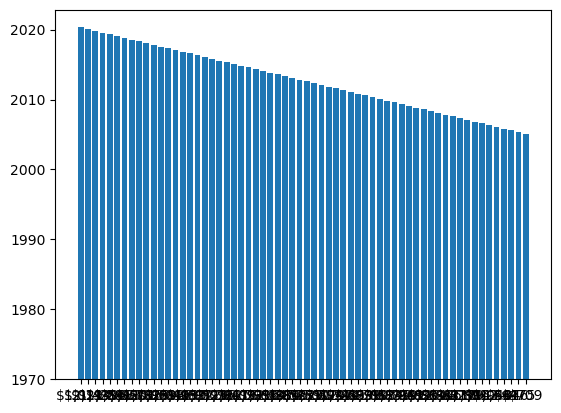

In [213]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[1]
    stock_data_specific = stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"]
    revenue_data_specific = revenue_data["GameStop Quarterly Revenue(Millions of US $).1"]
    
    stock_data_specific = pd.concat([stock_data_specific, revenue_data_specific], axis=1)
    print( stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"] )
    print( stock_data_specific["GameStop Quarterly Revenue(Millions of US $).1"] )
    stock_data_specific = stock_data_specific[stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"] <= '2021-07-01']

    revenue_data_specific = revenue_data_specific[revenue_data_specific <= '2021-04-30']
    
    plt.bar(stock_data_specific["GameStop Quarterly Revenue(Millions of US $).1"], pd.to_datetime(stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"], infer_datetime_format=True))
    plt.show()
    
    # fig = go.Figure()
    # fig.add_trace( go.Bar(x=pd.to_datetime(stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"], infer_datetime_format=True), 
    #            y=stock_data_specific["GameStop Quarterly Revenue(Millions of US $).1"]) )
    # fig.show()
    
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')

tesla_data = data_ticker.history(period="max")
html_data = pd.read_html(str(html_data))

# print( html_data )
# print( html_data[1].sort_values(by=['GameStop Quarterly Revenue(Millions of US $)']) )

gme_revenue = html_data[1]   
make_graph(html_data, gme_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


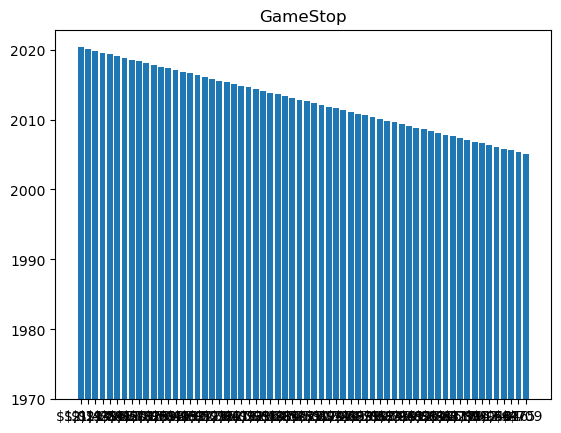

In [217]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[1]
    stock_data_specific = stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"]
    revenue_data_specific = revenue_data["GameStop Quarterly Revenue(Millions of US $).1"]
    
    stock_data_specific = pd.concat([stock_data_specific, revenue_data_specific], axis=1)
    # print( stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"] )
    # print( stock_data_specific["GameStop Quarterly Revenue(Millions of US $).1"] )
    stock_data_specific = stock_data_specific[stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"] <= '2021-07-01']

    revenue_data_specific = revenue_data_specific[revenue_data_specific <= '2021-04-30']
    
    plt.bar(stock_data_specific["GameStop Quarterly Revenue(Millions of US $).1"], pd.to_datetime(stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"], infer_datetime_format=True))
    
    plt.title("GameStop")
    plt.show()
    
    # fig = go.Figure()
    # fig.add_trace( go.Bar(x=pd.to_datetime(stock_data_specific["GameStop Quarterly Revenue(Millions of US $)"], infer_datetime_format=True), 
    #            y=stock_data_specific["GameStop Quarterly Revenue(Millions of US $).1"]) )
    # fig.show()
    
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text
html_data = BeautifulSoup(html_data, 'html5lib')

tesla_data = data_ticker.history(period="max")
html_data = pd.read_html(str(html_data))

# print( html_data )
# print( html_data[1].sort_values(by=['GameStop Quarterly Revenue(Millions of US $)']) )

gme_revenue = html_data[1]   
make_graph(html_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
